<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-11/Week%2011/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week11/Data/nba.csv"
df = pd.read_csv(fpath, index_col="Name")
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [24]:
df.isna().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

# Clean Data

In [25]:
df.dropna(inplace=True)

# Train/Test Split


In [26]:
X = df.drop(columns="TARGET_5Yrs")
y = df["TARGET_5Yrs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [27]:
X_train.shape

(996, 19)

# Scale Data


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

# Sequential Model w/o Dropout

In [30]:
# Without dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7399 - val_loss: 0.6590
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6481 - val_loss: 0.6026
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6136 - val_loss: 0.5833
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5960 - val_loss: 0.5735
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5854 - val_loss: 0.5690
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5771 - val_loss: 0.5662
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5706 - val_loss: 0.5630
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5662 - val_loss: 0.5614
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5627 - val_loss: 0.5640
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5594 - val_loss: 0.5592
Epoch 11/

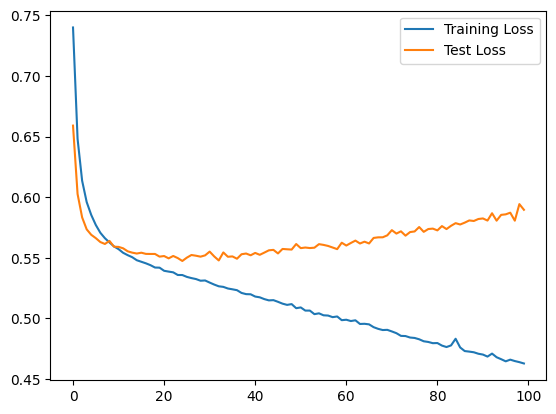

In [31]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.legend();

# Sequential w/ Dropout (Prevent Overfitting)

prevent overfitting. Dropout in Keras is coded as another layer after the layer you would like to dropout.

In [34]:
# With dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dropout(.2))
model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 26ms/step - loss: 0.7011 - val_loss: 0.6147
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6452 - val_loss: 0.5829
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6222 - val_loss: 0.5728
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6098 - val_loss: 0.5723
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6010 - val_loss: 0.5696
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.5680
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.5691
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5965 - val_loss: 0.5722
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5951 - val_loss: 0.5749
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5909 - val_loss: 0.5733
Epoch 11

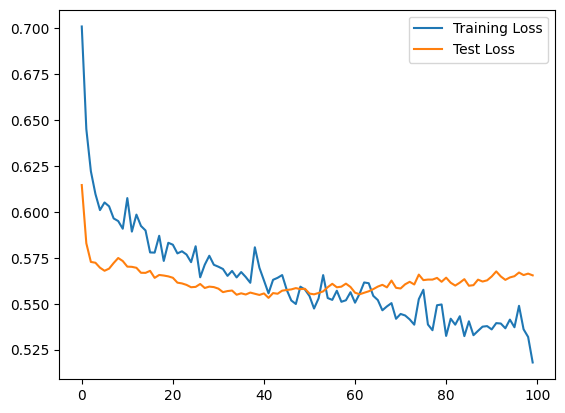

In [35]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.legend();